<a href="https://colab.research.google.com/github/timmymalone/Data_Science/blob/main/Malone_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): #will let plots work with data provided
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url): #Will let google slides work for data set
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1_OpHEXct_VWOm5ElP3FHbqtc2V2ggmULRQvXX-Y7JIk/edit#slide=id.p" #where slides link is pasted

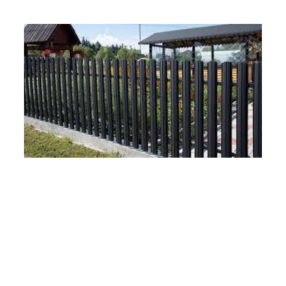

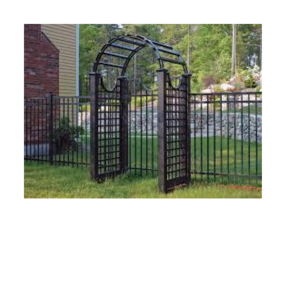

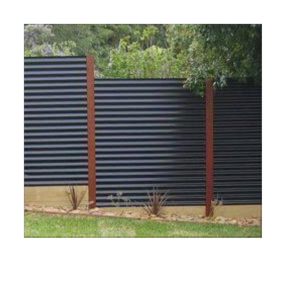

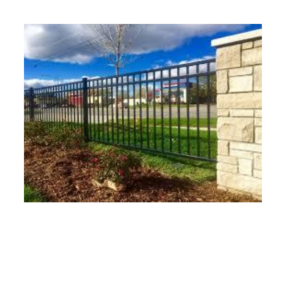

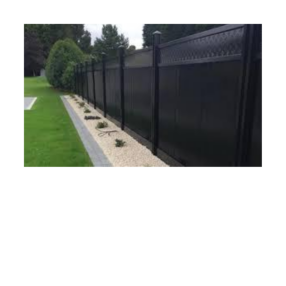

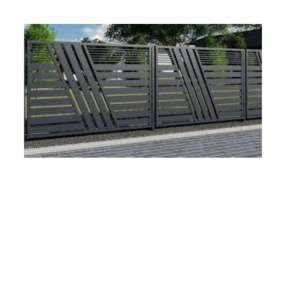

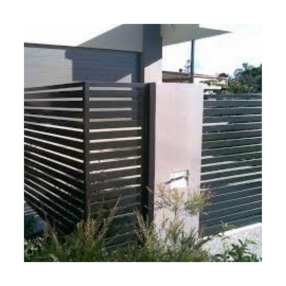

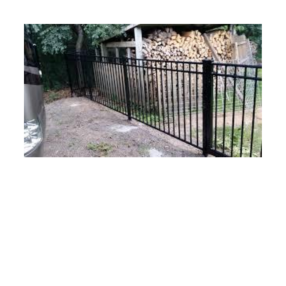

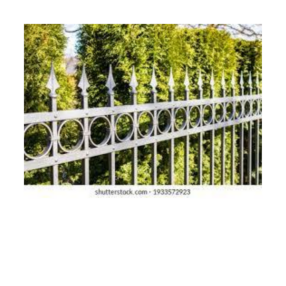

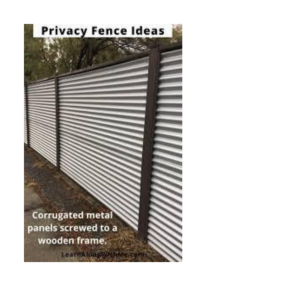

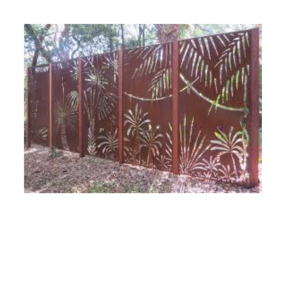

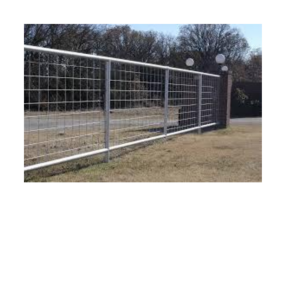

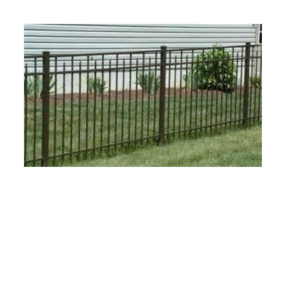

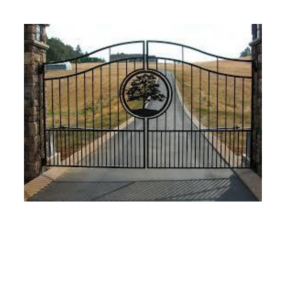

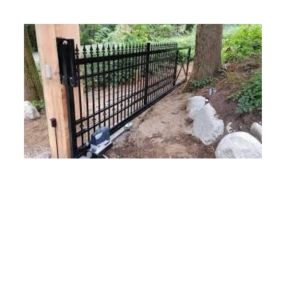

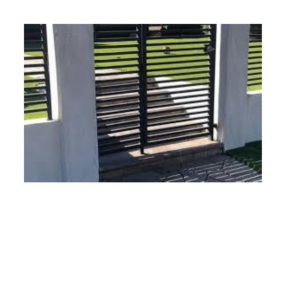

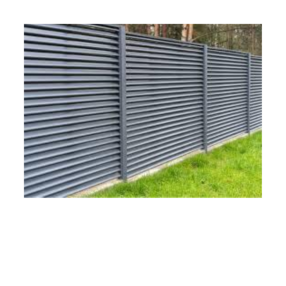

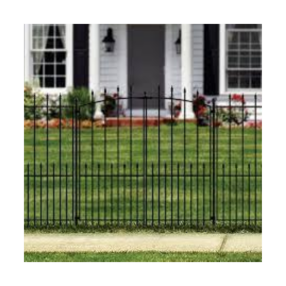

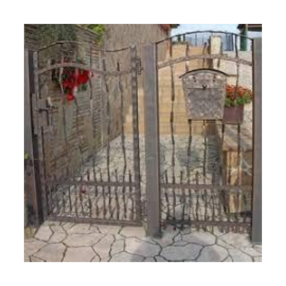

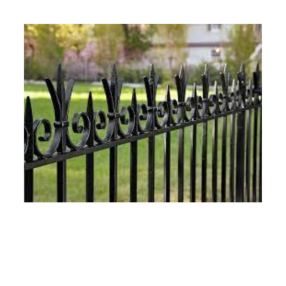

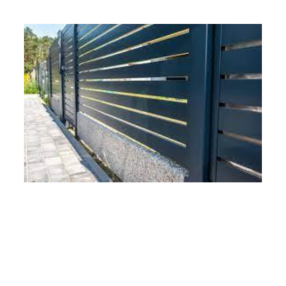

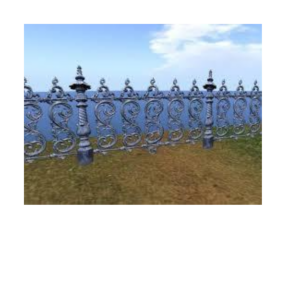

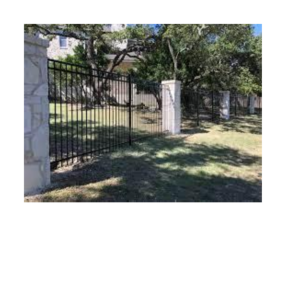

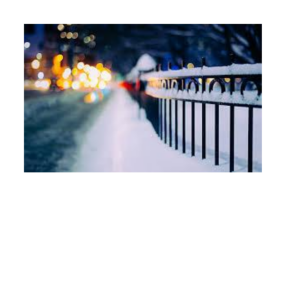

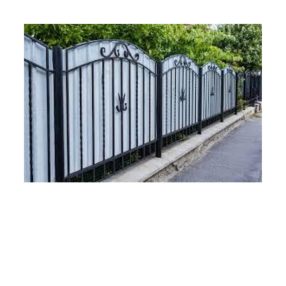

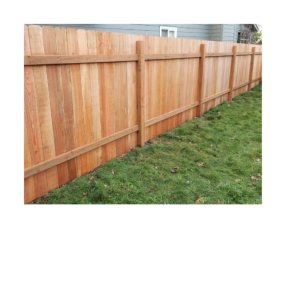

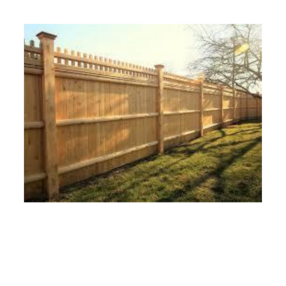

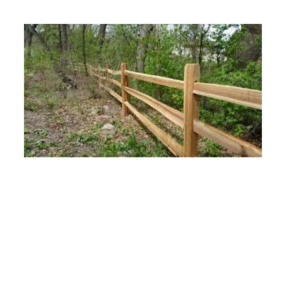

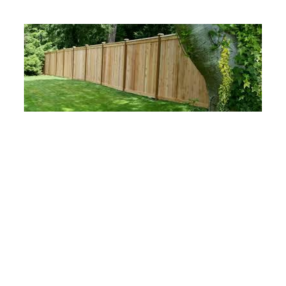

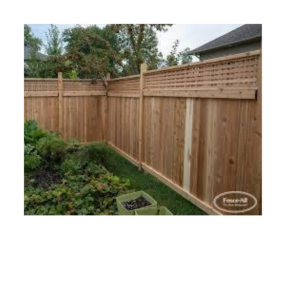

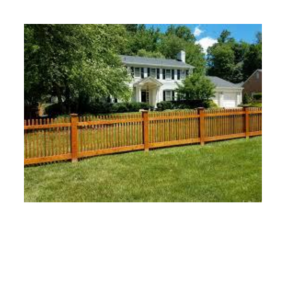

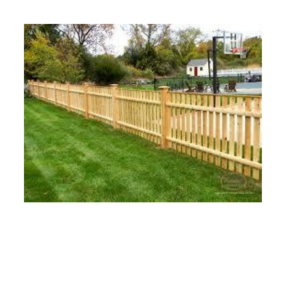

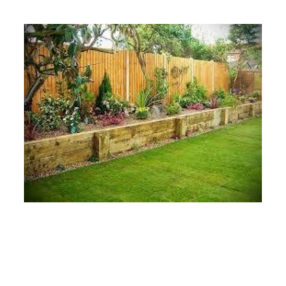

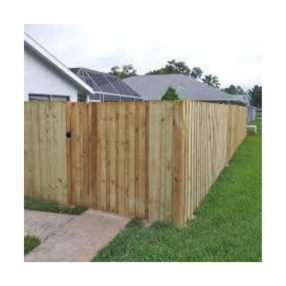

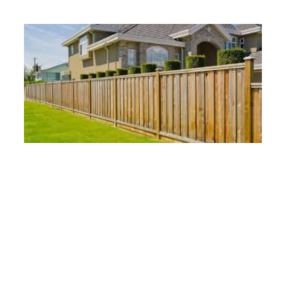

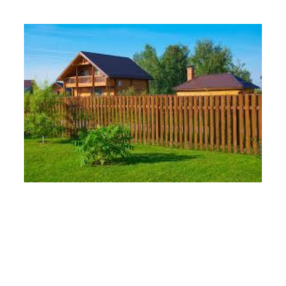

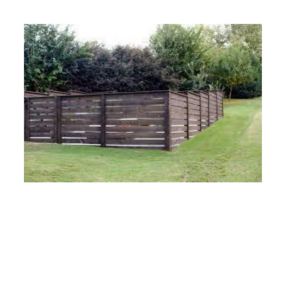

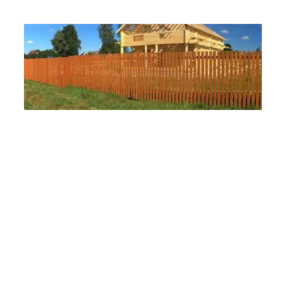

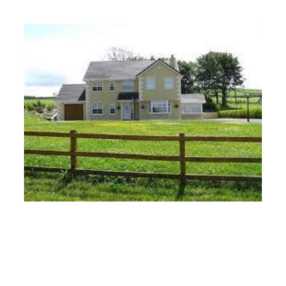

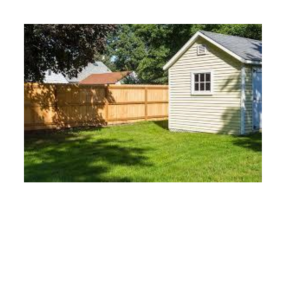

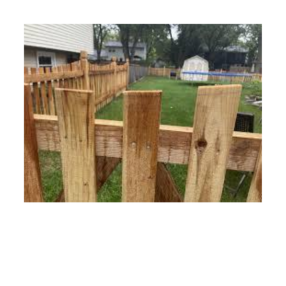

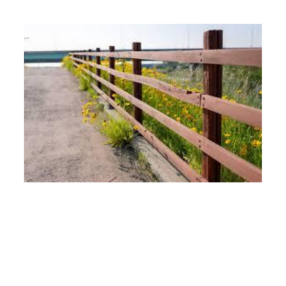

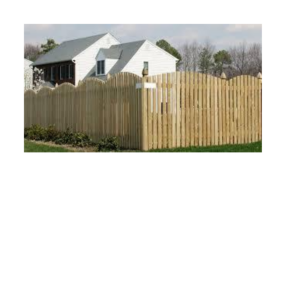

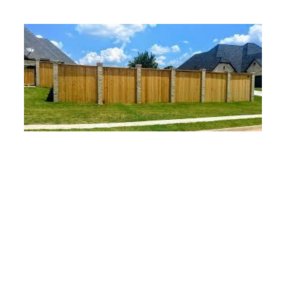

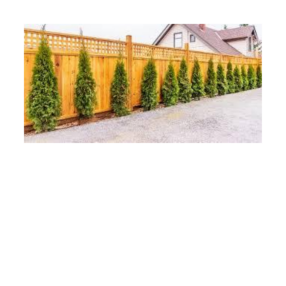

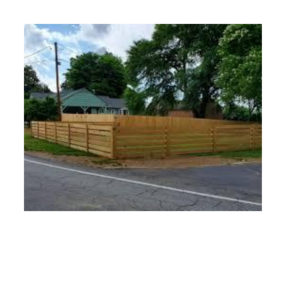

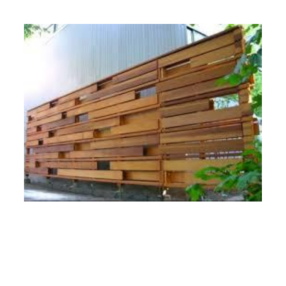

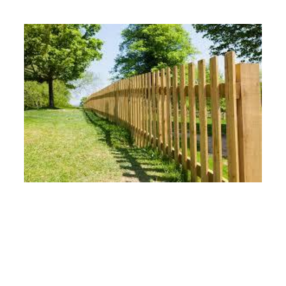

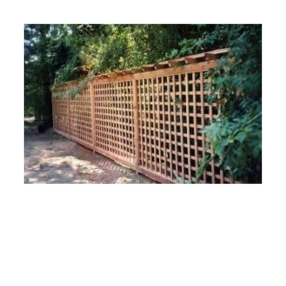

In [ ]:
images = [] #This will present/upload all of the photos from the slide show

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape

torch.Size([49, 3, 224, 224])

In [ ]:
model(images)

tensor([[ 0.2798, -3.1549, -3.5161,  ..., -2.7837,  1.6536,  2.0596],
        [ 1.6518, -4.1839, -3.7141,  ..., -2.8713,  0.7709,  1.0468],
        [ 2.6584, -1.6089, -6.0854,  ..., -4.1083,  1.3656, -0.8728],
        ...,
        [-0.7095, -4.3041, -7.0771,  ..., -4.3988,  3.8437, -2.5783],
        [ 2.2812, -0.4427, -7.1181,  ..., -0.4783,  5.3573,  0.5595],
        [ 2.0818, -2.6374, -6.8968,  ..., -4.3643,  6.2410,  0.8721]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([49, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy() #guessing photos from the data

In [ ]:
for i in list(guesses): #guesses what your photos are
    print(labels[i])

chime, bell, gong
turnstile
window shade
web site, website, internet site, site
wallet, billfold, notecase, pocketbook
wallet, billfold, notecase, pocketbook
turnstile
crib, cot
abacus
space heater
wallet, billfold, notecase, pocketbook
bannister, banister, balustrade, balusters, handrail
worm fence, snake fence, snake-rail fence, Virginia fence
mousetrap
plate rack
space heater
space heater
scoreboard
fire screen, fireguard
screwdriver
bannister, banister, balustrade, balusters, handrail
lakeside, lakeshore
turnstile
panpipe, pandean pipe, syrinx
bannister, banister, balustrade, balusters, handrail
crate
freight car
folding chair
panpipe, pandean pipe, syrinx
freight car
web site, website, internet site, site
worm fence, snake fence, snake-rail fence, Virginia fence
monitor
hamper
crib, cot
barn
worm fence, snake fence, snake-rail fence, Virginia fence
panpipe, pandean pipe, syrinx
worm fence, snake fence, snake-rail fence, Virginia fence
mobile home, manufactured home
crate
park benc

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(49, 1000)

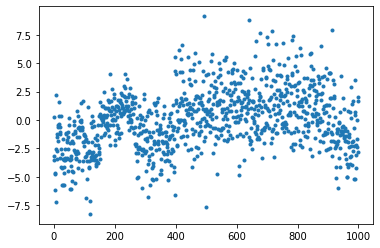

In [ ]:
plt.plot(X[0],'.') #This plot represents photos from your data set

In [ ]:
X[0]

array([ 2.79791832e-01, -3.15493298e+00, -3.51606011e+00, -6.11808586e+00,
       -4.74910021e+00, -4.69763327e+00, -7.19726276e+00, -2.57241035e+00,
        2.22037554e+00, -1.25149214e+00, -3.43718243e+00, -2.73974156e+00,
       -1.45894718e+00, -4.23304647e-01, -1.88752019e+00, -6.61831021e-01,
        3.72688770e-01,  1.60911620e+00, -3.19713384e-01, -1.26843548e+00,
       -3.34851122e+00, -1.07506204e+00, -5.85460067e-01,  3.80087137e-01,
       -4.14451694e+00, -2.58416748e+00, -5.75367069e+00, -3.03941298e+00,
       -4.22904968e+00, -3.41370511e+00, -5.75094891e+00, -1.70385957e+00,
       -4.17914295e+00, -4.67896175e+00, -3.54565120e+00, -5.68207741e+00,
       -3.38568997e+00, -3.49313045e+00, -2.55791020e+00, -1.24250793e+00,
       -1.13506913e+00, -3.46845460e+00, -3.31043625e+00, -1.73418045e+00,
       -1.90159619e+00, -2.53090048e+00, -1.48332310e+00, -1.05016816e+00,
       -4.48672628e+00, -3.46753192e+00,  2.03569174e-01, -4.41459179e-01,
       -3.55508566e+00, -

In [ ]:
np.argmax(X[0])

494

In [ ]:
labels[948]

'Granny Smith'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

chime, bell, gong
marimba, xylophone
worm fence, snake fence, snake-rail fence, Virginia fence
picket fence, paling
nail
screwdriver
panpipe, pandean pipe, syrinx
screw
monitor
radiator


In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  7.,  24.,  90., 178., 263., 256., 105.,  55.,  16.,   6.]),
 array([-8.265107 , -6.5265837, -4.7880607, -3.0495372, -1.3110139,
         0.4275093,  2.1660326,  3.9045558,  5.6430793,  7.3816023,
         9.120126 ], dtype=float32),
 <a list of 10 Patch objects>)

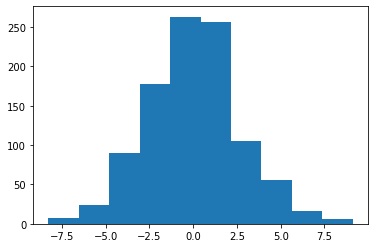

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X) # X and Y separtes the data
Y = GPU_data(Y)

In [ ]:
def softmax(x): #classifies data
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):  #allows for input and output of photos/numbers          
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): #allows values to be normal and not oversized

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([49, 1000])

In [ ]:
def get_batch(mode): #collects runs into a batch
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots(): #Access code is required to wake up or get it to work
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-102-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

#Best Runtime
acc_train : 0.96875
loss : 0.34451

#Average Runtime
acc_train :0.99764
loss :0.37589

#Worst Runtime
acc_train : 1.0
loss :0.31326